In [1184]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.filterwarnings(action="ignore")
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
# from catboost import CatBoostRegressor

import warnings
from sklearn.exceptions import ConvergenceWarning
# pd.options.display.max_seq_items = 8000
# pd.options.display.max_rows = 8000
pd.set_option("display.max_rows", 4000)
pd.set_option("display.max_columns", 500)
pd.set_option("display.max_colwidth", 300)

In [1185]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [1186]:
ida = test['Id']

# corr

In [1187]:
corr = train.corr()

high_corr_features = corr.index[corr['SalePrice'] < 0] 
high_corr_features

Index(['MSSubClass', 'OverallCond', 'BsmtFinSF2', 'LowQualFinSF',
       'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', 'MiscVal', 'YrSold'],
      dtype='object')

# outlier

In [1188]:
# train.plot.scatter('GrLivArea','SalePrice')
# a.plot.scatter('GrLivArea','SalePrice')
# a.shape
# b.plot.scatter('TotalBsmtSF','SalePrice')
# train.plot.scatter('TotalBsmtSF','SalePrice')

In [1189]:
# train = train.drop(train[(train['GrLivArea']>3500)].index) 
# train= train.drop(train[(train['TotalBsmtSF']>2300) ].index)

# change the type of columns

In [1190]:
train.MSSubClass=train.MSSubClass.astype(str)
train.OverallCond=train.OverallCond.astype(str)
test.MSSubClass=test.MSSubClass.astype(str)
test.OverallCond=test.OverallCond.astype(str)

# fill the null values

In [1191]:


train.MasVnrArea.fillna(0.0,inplace=True)
train.GarageYrBlt.fillna(0.0,inplace=True)
train.LotFrontage.fillna(train.LotFrontage.mean(),inplace=True)
train.MasVnrType.fillna(train.MasVnrType.mode()[0],inplace=True)

test.MasVnrArea.fillna(0.0,inplace=True)
test.GarageYrBlt.fillna(0.0,inplace=True)
test.LotFrontage.fillna(test.LotFrontage.mean(),inplace=True)
test.MasVnrType.fillna(test.MasVnrType.mode()[0],inplace=True)




def impute_null(df):
    cat_v=  [ i for i in df.columns if df.dtypes[i]=='object' if df[i].isnull().values.any()]
    num_v = [ i for i in df.columns if df.dtypes[i]!='object' if df[i].isnull().values.any()]
    for i in num_v:
        df[i].fillna(df[i].mean(), inplace =True)
    for i in cat_v:
        df[i].fillna('no', inplace =True)
            
impute_null(train)
impute_null(test)

# df.GarageYrBlt.fillna(df.GarageYrBlt.min(),inplace=True)
# # df.MasVnrType.fillna(df.MasVnrType.mode()[0],inplace=True)
# df.MasVnrArea.fillna(0.0,inplace=True)
# df.LotFrontage.fillna(df.LotFrontage.mean(),inplace=True)

# df.Alley.fillna("None",inplace=True)
# df.MasVnrType.fillna(df.MasVnrType.mode()[0],inplace=True)
# df.loc[:,["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2"]]=df.loc[:,["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2"]].fillna("None")
# df.Electrical.fillna(df.Electrical.mode()[0],inplace=True)
# df.FireplaceQu.fillna("None",inplace=True )
# df.loc[:,["GarageType","GarageFinish","GarageQual","GarageCond"]]=df.loc[:,["GarageType","GarageFinish","GarageQual","GarageCond"]].fillna("None")
# df.PoolQC.fillna("None",inplace=True)
# df.Fence.fillna("None",inplace=True)
# df.MiscFeature.fillna("None",inplace=True)

In [1192]:
df = pd.concat([train, test])

In [1193]:
# df["TotalBathAbo"]=(df.HalfBath*0.5)+df.FullBath
# df["TotalBathBsm"]=(df.BsmtHalfBath*0.5)+df.BsmtFullBath
# df.drop(["HalfBath","FullBath","BsmtHalfBath","BsmtFullBath"], axis = 1,inplace  =True)

In [1194]:
df.isnull().sum().sum()

234

# dropping the columns

In [1195]:
df.drop(['Alley','Id','PoolQC','Fence'], axis = 1,inplace  =True)
# test.drop(['Alley','Id','PoolQC','Fence'], axis = 1, inplace  =True)
# df = pd.concat([train, test])

In [1196]:
df.shape

(1168, 77)

# encoding

In [1197]:
col = [ 'MSZoning', 'Street',  'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
        'MiscFeature', 'SaleType', 'SaleCondition']

# col=["KitchenQual","LandContour","LandSlope","HouseStyle",
#         "ExterQual","BsmtQual","BsmtExposure","BsmtFinType1","HeatingQC",
#         "FireplaceQu","GarageFinish","PoolQC","Fence","Functional","Condition2","Condition1","LotShape","SaleCondition",
#         'BsmtFinType2','BsmtCond','ExterCond','GarageCond', 'GarageQual'
#         ]

# #20
# nominal=["Electrical","CentralAir","Foundation","MasVnrType","Exterior2nd","Exterior1st","RoofMatl",
#          "RoofStyle","BldgType","MSZoning","Street","Alley",
#          "Utilities","LotConfig","Neighborhood","Heating","GarageType","PavedDrive","MiscFeature"]


In [1198]:
from sklearn.preprocessing import LabelEncoder
for i in col:  
    m = LabelEncoder()
    m.fit(df[i])
    df[i] = m.transform(df[i])

In [1199]:
df.shape


(1168, 77)

# one hot encoding

In [1200]:
df.select_dtypes(include="object").columns

Index(['MSSubClass', 'OverallCond'], dtype='object')

In [1201]:
dff = pd.get_dummies(df)
df_tr = dff[dff['SalePrice'].isnull()==False]
df_te = dff[dff['SalePrice'].isnull()]
df_te.drop(['SalePrice'], axis = 1, inplace = True)

In [1202]:
dff.shape

(1168, 99)

# split the data

In [1203]:
a = np.log(df_tr['SalePrice'])

x_train, x_test, y_train, y_test = train_test_split(df_tr.drop('SalePrice',axis = 1), a, test_size = 0.12, random_state = 0)

# Xgboost

In [1204]:
xgb=XGBRegressor(n_estimators=320,max_depth=3,learning_rate=0.08)
xgb.fit(x_train,y_train)
y_pred_xgb=xgb.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print("RMSE: ", rmse)
r2 = r2_score(y_test, y_pred_xgb)
print("R2 score: ", r2)
# RMSE:  0.10449825445169386
# R2 score:  0.9216346580581922
# all one hot encoder 
# RMSE:  0.10403949111689996
# R2 score:  0.9223212193844693
# label encoder except overall and 
# RMSE:  0.107176439680322
# R2 score:  0.9175663342502193

RMSE:  0.10430388323291506
R2 score:  0.9219259127025556


# GradientBoosting

In [1205]:
gb=GradientBoostingRegressor(n_estimators=300,max_depth=3)
gb.fit(x_train,y_train)
y_pred_gb=gb.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_gb))
print("RMSE: ", rmse)
r2 = r2_score(y_test, y_pred_gb)
print("R2 score: ", r2)
# RMSE:  0.11336184219925054
# R2 score:  0.9077768927687941
# all onehot encoder
# RMSE:  0.11172458116325136
# R2 score:  0.9104215731141568
# all labelencoder except overall
# RMSE:  0.10795525245975
# R2 score:  0.9163639496000973

RMSE:  0.10736247452016402
R2 score:  0.9172799122825535


In [1206]:
y_pred = gb.predict(x_test)
mse=metrics.mean_squared_error(y_test,y_pred)
print(np.sqrt(mse))
r2_score(y_test, y_pred)
# 0.11336184219925054
# 0.9077768927687941

0.10736247452016402


0.9172799122825535

In [1207]:
y_pred = gb.predict(x_train)
mse=metrics.mean_squared_error(y_train,y_pred)
print(np.sqrt(mse))
r2_score(y_train, y_pred)
# 0.03802138866002725
# 0.9907321610984814

0.039248933674991444


0.9901240643549093

# learnning curve

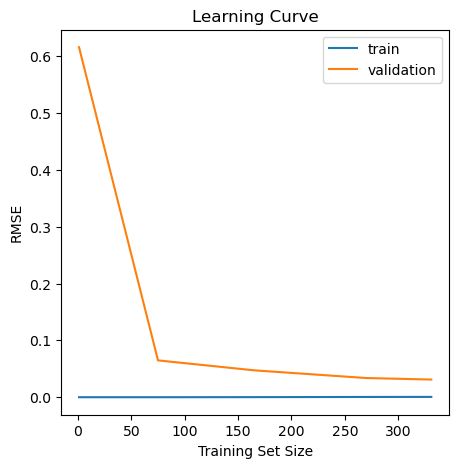

In [1208]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator=gb,
    X=df_tr,
    y=a,
    cv=5,
    scoring="neg_root_mean_squared_error",
    train_sizes = [1, 75, 165, 270, 331]
)

train_mean = -train_scores.mean(axis=1)
test_mean = -test_scores.mean(axis=1)

plt.subplots(figsize=(5,5))
plt.plot(train_sizes, train_mean, label="train")
plt.plot(train_sizes, test_mean, label="validation")

plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("RMSE")
plt.legend(loc="best")

plt.show()

# predict the test data

In [1209]:
a = ida
final_predictions= np.exp(xgb.predict(df_te))
submission = pd.concat([a,pd.Series(final_predictions,name="SalePrice")],axis=1)
submission
# submission.to_csv("xgb_final.csv",index=False,header=True)
# 42	150317.6507
# 1156	180433.7666
# 239	263367.0854
# 810	127258.5286
# 471	224859.9854
# 1315	117449.5442
# 478	454495.9043
# 1347	285202.3161
# 721	278248.6179
# 755	146947.6055
# 403	100304.4918
# 432	106793.7114


,Id,SalePrice
0,42,164669.375000
1,1156,179255.281250
2,239,245329.281250
3,810,120371.671875
4,471,219464.625000
5,1315,110726.515625
6,478,419277.031250
7,1347,284803.843750
8,721,223260.687500
9,755,145355.546875
